必要なライブラリを読み込む

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

分かち書きされたテキストを読み込み

In [2]:
f = open('analysis_text.txt')
text = f.read()
f.close()
#print(text) # for debug

WordCloudで可視化

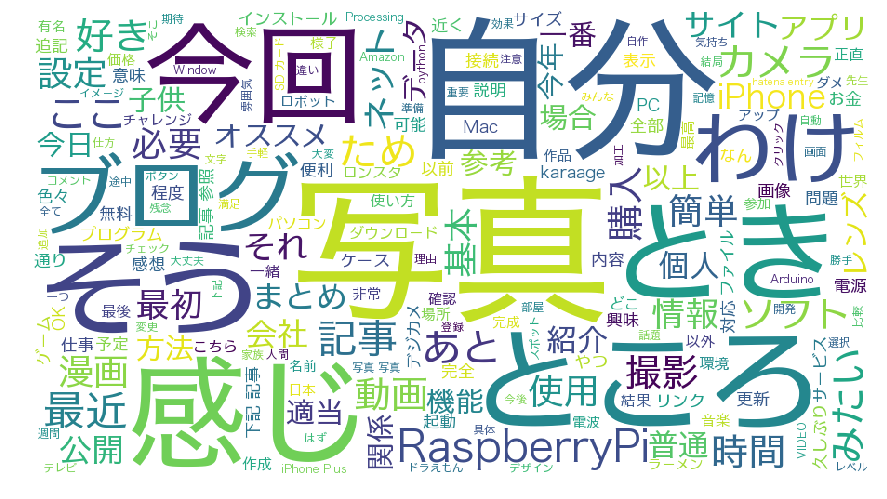

In [3]:
fpath = "~/System/Library/Fonts/AquaKana.ttc" # for mac setting
wordcloud = WordCloud(background_color="white", font_path=fpath, width=900, height=500).generate(text)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

word2vecを使って単語をベクトル化する

In [4]:
from gensim.models import word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) # 今どれくらい処理が進んでるか確認する用
sentences = word2vec.LineSentence('analysis_text.txt')
model = word2vec.Word2Vec(sentences,
                          sg=1,         #0: CBOW, 1: skip-gram
                          size=300,     # ベクトルの次元数
                          window=5,    # 入力単語からの最大距離
                          min_count=5,  # 単語の出現回数でフィルタリング
                          )

model.save("./word2vec.model")

2018-02-11 17:27:37,103 : INFO : collecting all words and their counts
2018-02-11 17:27:37,123 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-02-11 17:27:37,159 : INFO : collected 19047 word types from a corpus of 218501 raw words and 22 sentences
2018-02-11 17:27:37,160 : INFO : Loading a fresh vocabulary
2018-02-11 17:27:37,174 : INFO : min_count=5 retains 5428 unique words (28% of original 19047, drops 13619)
2018-02-11 17:27:37,175 : INFO : min_count=5 leaves 195971 word corpus (89% of original 218501, drops 22530)
2018-02-11 17:27:37,189 : INFO : deleting the raw counts dictionary of 19047 items
2018-02-11 17:27:37,190 : INFO : sample=0.001 downsamples 44 most-common words
2018-02-11 17:27:37,191 : INFO : downsampling leaves estimated 179218 word corpus (91.5% of prior 195971)
2018-02-11 17:27:37,203 : INFO : estimated required memory for 5428 words and 300 dimensions: 15741200 bytes
2018-02-11 17:27:37,204 : INFO : resetting layer weights
2018-02-

EmbeddingProjectorの入力フォーマットに合わせてファイル出力

In [5]:
with open('vector.tsv', 'w', encoding='utf-8') as f, \
     open('metadata.tsv', 'w', encoding='utf-8') as g:

    # metadata file needs header for over two words
    # g.write('Word\n')

    for word in model.wv.vocab.keys():
        embedding = model.wv[word]

        # Save vector TSV file
        f.write('\t'.join([('%f' % x) for x in embedding]) + '\n')

        # Save metadata TSV file
        g.write(word + '\n')

print("file is saved")

file is saved
